In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(datetime.datetime.now())

2019-01-15 11:16:26.497793


In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_answer = train_df['label']
train_df = train_df.drop('label', axis=1)

arr = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for digit in train_answer:
    arr[digit - 1] = arr[digit - 1] + 1

In [4]:
def display_digits(N):
    images = np.random.randint(low=0, high=35300, size=N).tolist()

    subset_images = train_df.iloc[images, :]
    subset_images.index = range(1, N + 1)

    for i, row in subset_images.iterrows():
        plt.subplot((N // 8) + 1, 8, i)
        pixels = row.values.reshape((28, 28))
        plt.imshow(pixels, cmap='gray')
        plt.xticks([])
        plt.yticks([])

    plt.show()
    return ""

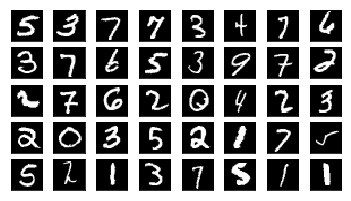

''

In [5]:
display_digits(40)

In [6]:
arr = np.random.randint(low=0, high=35300, size=1).tolist()[0]

pixels = train_df.iloc[arr, 0:]
image = train_df.iloc[arr, 0:].values.reshape((28, 28))

pmin, pmax = image.min(), image.max()

print(pmin)
print(pmax)

0.0
255.0


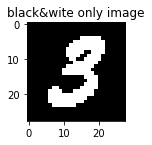

In [ ]:
rescaled_image = 255 * (image - pmin) / (pmax - pmin)
rescaled_pixels = rescaled_image.flatten()

bw_pixels = pixels.apply(lambda x: 0 if x == 0 else 255)
bw_image = bw_pixels.values.reshape((28, 28))

plt.subplot(1, 3, 3)
plt.imshow(bw_image, cmap='gray')
plt.title('black&wite only image')
plt.show()

In [ ]:
def display_rescaled_digits(N):
    images = np.random.randint(low=0, high=35300, size=N).tolist()
    subset_images = train_df.iloc[images, :]
    subset_images.index = range(1, N + 1)

    for i, row in subset_images.iterrows():
        plt.subplot((N // 8) + 1, 20, i)
        image = row.values.reshape((28, 28))
        pixels = image.flatten()

        bw_pixels = row.apply(lambda x: 0 if x == 0 else 255)
        bw_image = bw_pixels.values.reshape((28, 28))

        plt.imshow(bw_image, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.show()

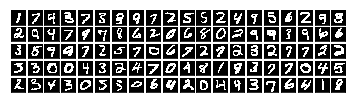

In [ ]:
display_rescaled_digits(100)

In [ ]:
num_list = list(range(35300))
print(num_list[:100])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [ ]:
print(train_df.iloc[[28], :])

    pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
28       0       0       0       0       0       0       0       0       0   

    pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
28       0    ...          0.0       0.0       0.0       0.0       0.0   

    pixel779  pixel780  pixel781  pixel782  pixel783  
28       0.0       0.0       0.0       0.0       0.0  

[1 rows x 784 columns]


In [ ]:
train_df = train_df.fillna(0)
test_df = test_df.fillna(0)
combine = [train_df, test_df]

for dataset in combine:
    for i in dataset:
        dataset.loc[dataset[i] < 80, i] = 0
        dataset.loc[(dataset[i] > 80) & (dataset[i] < 160), i] = 1
        dataset.loc[dataset[i] >= 160, i] = 2
        dataset[i] = dataset[i].astype(int)

combine = [train_df, test_df]

In [ ]:
train_answer

In [ ]:
from sklearn.svm import SVC, LinearSVC

In [ ]:
svc = SVC()
svc.fit(train_df, train_answer)
Y_pred = svc.predict(test_df)

In [ ]:
acc_svc = round(svc.score(train_df, train_answer) * 100, 2)
acc_svc

In [ ]:
result = list()
for i, preds in enumerate(Y_pred):
    result.append([i + 1, preds])
    
sub = pd.DataFrame(result, columns=['ImageId', 'Label'])

In [ ]:
sub.to_csv('sample_submission.csv', index=False)

In [ ]:
print(datetime.datetime.now())